# BAL Cytokine Deconvolution
Here we locate likely sources of cytokines measured in BAL fluid by examining the expression of the genes encoding them.

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read in data

In [2]:
data_dir = "/projects/b1038/Pulmonary/cpuritz/PASC/data"
adata = sc.read_h5ad(f"{data_dir}/01BAL/01integrated_BAL_GEO_v2/01integrated_BAL_GEO_v2.h5ad")
adata_rpra = adata[adata.obs.is_RPRA == "True"].copy()

In [3]:
cell_order = ["TRAM-1", "TRAM-2", "TRAM-3", "TRAM-4", "TRAM-5", "TRAM-6", "TRAM-7", "Proliferating macrophages",
              "MoAM-1", "MoAM-2", "MoAM-3", "MoAM-4", "Perivascular macrophages", "Monocytes-1", "Monocytes-2",
              "CD4 T cells-1", "CD4 T cells-2", "CD8 T cells-1", "CD8 T cells-2", "CD8 T cells-3", "Tregs",
              "gdT cells and NK cells", "Proliferating T cells", "DC1", "DC2", "Migratory DC", "pDC", "Mast cells",
              "B cells", "Plasma cells"]

## Cytokines which were differentially abundant

In [4]:
# Gene-cytokine correspondence
gene_dict = {
     "CXCL13" : "BCA-1",
        "EGF" : "EGF",
      "CXCL5" : "ENA-78",
       "IL1A" : "IL-1a",
      "IL1RN" : "IL-1RA",
       "IL21" : "IL-21",
        "IL6" : "IL-6",
      "CXCL8" : "IL-8",
       "CCL2" : "MCP-1",
       "CCL7" : "MCP-3",
       "CCL4" : "MIP-1b",
      "CCL15" : "MIP-1d",
     "CD40LG" : "sCD40L",
    "TNFSF10" : "TRAIL"
}
# CCL11 (eotaxin-1) was not expressed
[x for x in gene_dict.keys() if x not in adata_rpra.raw.var.index]

[]

In [5]:
cluster_expression = sc.get.obs_df(adata_rpra, keys = ["cell_type", *gene_dict.keys()], use_raw = True)
cluster_expression = cluster_expression.rename(columns = {k : f"{k} ({v})" for k, v in gene_dict.items()})
celltype_expression = cluster_expression.groupby("cell_type").mean(numeric_only = True)
celltype_expression.index.name = None
celltype_expression = celltype_expression.reindex(cell_order).T
celltype_expression.to_csv(f"{data_dir}/deidentified_data/deidentified_cytokine_mean_expression.csv")

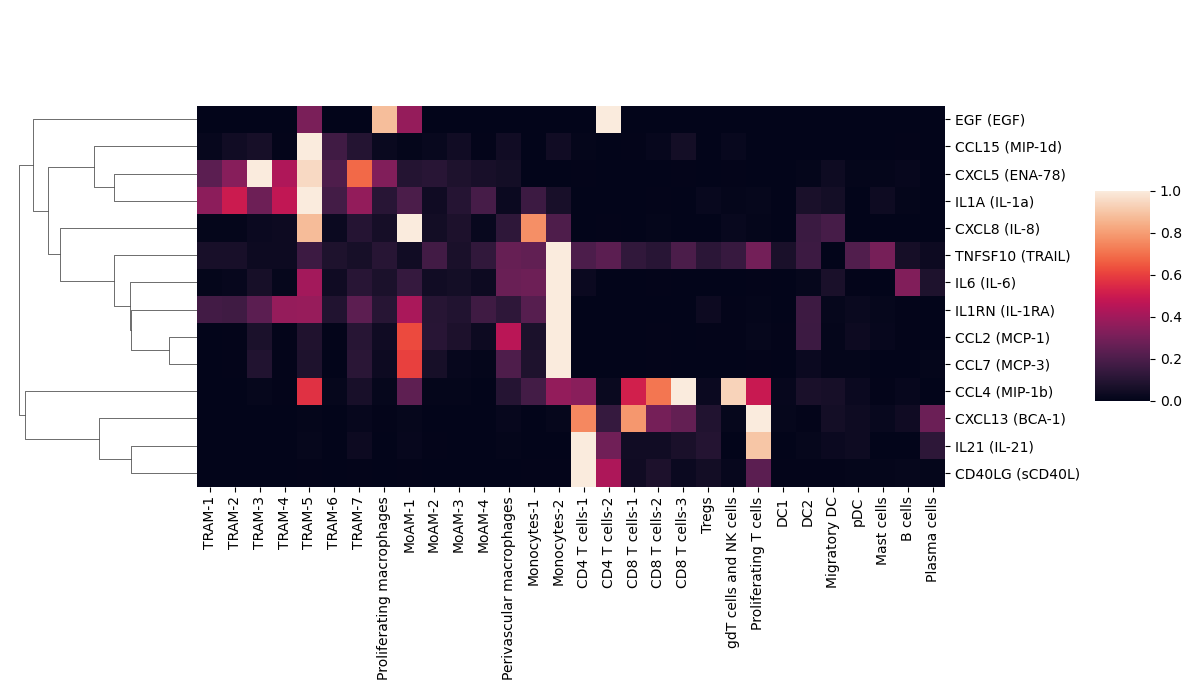

In [6]:
sns.clustermap(celltype_expression, standard_scale = 0, row_cluster = True, col_cluster = False,
                  cbar_pos = (1, 0.42, 0.05, 0.3), figsize = (11, 7));

## All cytokines

In [7]:
# Gene-cytokine correspondence
gene_dict_all = {
        "CXCL13" : "BCA-1",
         "CCL27" : "CTACK",
           "EGF" : "EGF",
         "CXCL5" : "ENA-78",
         "CCL24" : "Eotaxin-2",
         "CCL26" : "Eotaxin-3",
          "FGF2" : "FGF-2",
        "CX3CL1" : "Fractalkine",
          "CSF3" : "G-CSF",
          "CSF2" : "GM-CSF",
          "CCL1" : "I-309",
          "IL10" : "IL-10",
          "IL13" : "IL-13",
          "IL15" : "IL-15",
          "IL16" : "IL-16",
         "IL17A" : "IL-17A",
          "IL1A" : "IL-1a",
          "IL1B" : "IL-1b",
         "IL1RN" : "IL-1RA",
          "IL21" : "IL-21",
         "IL12B" : "IL-23",
          "IL33" : "IL-33",
           "IL5" : "IL-5",
           "IL6" : "IL-6",
           "IL7" : "IL-7",
         "CXCL8" : "IL-8",
           "IL9" : "IL-9",
        "CXCL10" : "IP-10",
           "LIF" : "LIF",
          "CCL2" : "MCP-1",
          "CCL8" : "MCP-2",
          "CCL7" : "MCP-3",
         "CCL13" : "MCP-4",
         "CCL22" : "MDC",
          "CCL3" : "MIP-1a",
          "CCL4" : "MIP-1b",
         "CCL15" : "MIP-1d",
        "CD40LG" : "sCD40L",
         "CCL17" : "TARC",
           "TNF" : "TNFa",
           "LTA" : "TNFb",
           "TPO" : "TPO",
       "TNFSF10" : "TRAIL",
          "TSLP" : "TSLP"
}
# CCL11 (eotaxin-1), IL20 (IL-20), and CCL21 (6CKine) were not expressed
[x for x in gene_dict_all.keys() if x not in adata.raw.var.index]

[]

In [8]:
cluster_expression = sc.get.obs_df(adata_rpra, keys = ["cell_type", *gene_dict_all.keys()], use_raw = True)
cluster_expression = cluster_expression.rename(columns = {k : f"{k} ({v})" for k, v in gene_dict_all.items()})
celltype_expression = cluster_expression.groupby("cell_type").mean(numeric_only = True)
celltype_expression.index.name = None
celltype_expression = celltype_expression.reindex(cell_order).T
celltype_expression.to_csv(f"{data_dir}/deidentified_data/deidentified_cytokine_mean_expression_all.csv")

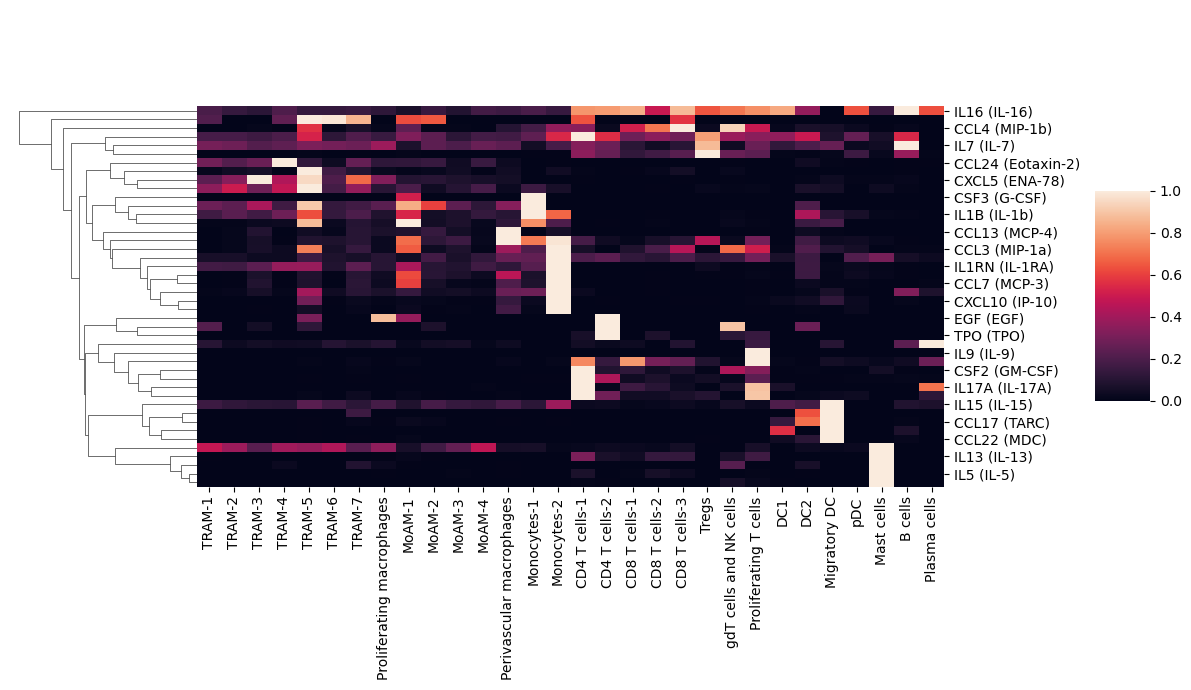

In [9]:
sns.clustermap(celltype_expression, standard_scale = 0, row_cluster = True, col_cluster = False,
                  cbar_pos = (1, 0.42, 0.05, 0.3), figsize = (11, 7));